In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import pandas as pd
# import scipy as needed

In [47]:
#Import Sun Roof and Election data

solar_raw = pd.read_csv("./deepsolar_tract.csv", encoding = "ISO-8859-1")
county_elec_raw = pd.read_csv("./county_2018_elections.csv", encoding = "ISO-8859-1")

In [79]:
solar_grouped_temp = solar_raw.groupby(['county', 'state'], as_index=False)
solar_grouped_sumed = solar_grouped_temp.sum().sort_values(['county', 'state'])
solar_grouped_avged = solar_grouped_temp.mean().sort_values(['county', 'state'])
ratio_panels_to_housing_units = solar_grouped_sumed['tile_count'] / solar_grouped_sumed['housing_unit_count']
solar_grouped_sums = solar_grouped_sumed[['county', 'state', 'tile_count', 'solar_system_count', 'total_panel_area', 'land_area', 'total_area', 'population']].sort_values(['county', 'state'])
solar_grouped_avgs = solar_grouped_avged[['county', 'state', 'population_density', 'race_asian_rate', 'race_black_africa_rate', 'race_indian_alaska_rate', 'race_islander_rate', 'race_white_rate', 'race_other_rate', 'race_two_more_rate', 'diversity','voting_2016_dem_percentage', 'voting_2016_gop_percentage', 'voting_2012_dem_percentage', 'voting_2012_gop_percentage']].sort_values(['county', 'state'])

solar_grouped_all = pd.merge(solar_grouped_sums, solar_grouped_avgs, on=['county', 'state']).sort_values(['county', 'state'])
solar_grouped_all['ratio_panels_to_housing_units'] = ratio_panels_to_housing_units
solar_grouped_all = solar_grouped_all.sort_values(['state', 'county'])

solar_grouped_all.head()

,county,state,tile_count,solar_system_count,total_panel_area,land_area,total_area,population,population_density,race_asian_rate,...,race_islander_rate,race_white_rate,race_other_rate,race_two_more_rate,diversity,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2012_dem_percentage,voting_2012_gop_percentage,ratio_panels_to_housing_units
107,Autauga County,al,28.0,23.0,2567.542490,594.436015,604.388097,55221,810.895779,0.007066,...,0.00063,0.749282,0.010090,0.017455,0.342924,0.239569,0.734358,0.266,0.726,0.001240
116,Baldwin County,al,254.0,201.0,18351.453746,1589.783989,2027.311190,195121,430.466918,0.006676,...,0.00000,0.864741,0.008176,0.016964,0.213399,0.195653,0.773515,0.216,0.774,0.002387
128,Barbour County,al,8.0,6.0,1010.677426,884.876361,904.515217,26932,133.333457,0.006923,...,0.00000,0.479236,0.035038,0.011599,0.527576,0.466603,0.522714,0.513,0.483,0.000677
197,Bibb County,al,2.0,1.0,225.353902,622.582300,626.168790,22604,46.520710,0.001427,...,0.00000,0.799359,0.000209,0.017350,0.285977,0.214220,0.769662,0.262,0.731,0.000223
217,Blount County,al,18.0,6.0,960.822726,644.775890,650.628210,57710,93.144891,0.001153,...,0.00000,0.952655,0.010608,0.016832,0.090340,0.084699,0.898519,0.123,0.865,0.000754


In [105]:
y.to_numpy()

array([0.04710347, 0.15977013, 0.00904081, ..., 0.02018004, 0.00178687,
       0.001251  ])

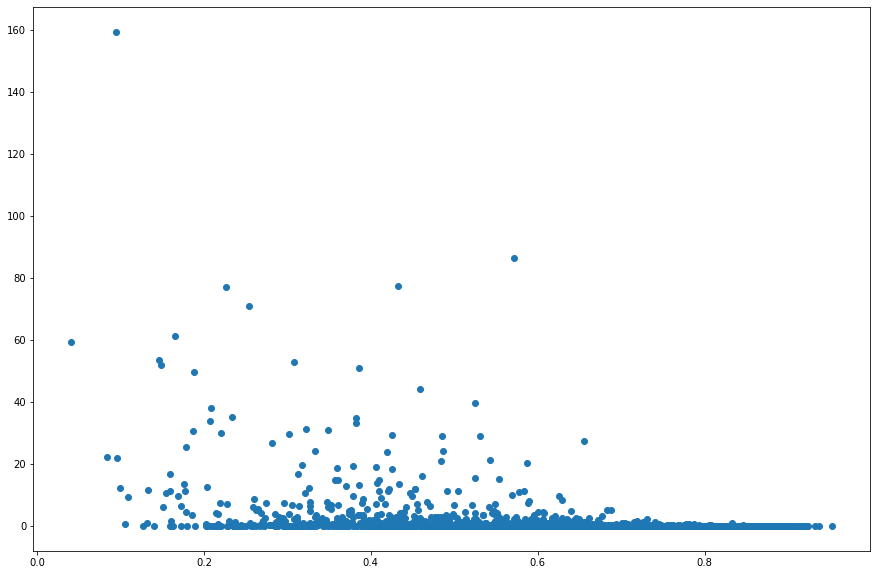

In [106]:
plt.figure(figsize=(15, 10))
y = solar_grouped_all['tile_count']/solar_grouped_all['land_area'].to_numpy()
plt.scatter(solar_grouped_all['voting_2016_gop_percentage'].to_numpy(), y)

In [82]:
deepsolar_counties = solar_grouped_all[['county', 'state', 'tile_count', 'solar_system_count', 'total_panel_area', 'land_area', 'total_area', 'ratio_panels_to_housing_units', 'population', 'population_density', 'race_asian_rate', 'race_black_africa_rate', 'race_indian_alaska_rate', 'race_islander_rate', 'race_white_rate', 'race_other_rate', 'race_two_more_rate', 'diversity','voting_2016_dem_percentage', 'voting_2016_gop_percentage', 'voting_2012_dem_percentage', 'voting_2012_gop_percentage']]
deepsolar_counties.to_csv('./deepsolar_counties.csv')